<a href="https://colab.research.google.com/github/Nidhi-Sinha-data/-Statistics-Advance-/blob/main/task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Data Loading and Cleaning

In [ ]:
df= pd.read_csv("/content/retail_sales_dataset.csv")
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [ ]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
df.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [ ]:
df.shape

(1000, 9)

In [ ]:
#Duplicates check
df.duplicated().sum()

np.int64(0)

In [ ]:
#Date column  convert into datetime
df["Date"] =pd.to_datetime(df["Date"],format="%Y-%m-%d")

In [ ]:
# Check for missing values
df.isnull().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


# 2. Descriptive Statistics

In [ ]:
df.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


In [ ]:
print("\nKey Stats:")
print("Mean Total Amount:", df['Total Amount'].mean())
print("Median Total Amount:", df['Total Amount'].median())
print("Most common Product Category:", df['Product Category'].mode()[0])
print("Standard Deviation of Age:", df['Age'].std())


Key Stats:
Mean Total Amount: 456.0
Median Total Amount: 135.0
Most common Product Category: Clothing
Standard Deviation of Age: 13.681429659122532


In [ ]:
# uniques values of the dataset
df.nunique()

,0
Transaction ID,1000
Date,345
Customer ID,1000
Gender,2
Age,47
Product Category,3
Quantity,4
Price per Unit,5
Total Amount,18


# 3. Time Series Analysis

In [ ]:
df["Month"]= df['Date'].dt.to_period('M')
monthly_sales =df.groupby('Month')['Total Amount'].sum()
print('\nmonthly_sales:')
print(monthly_sales)


monthly_sales:
Month
2023-01    35450
2023-02    44060
2023-03    28990
2023-04    33870
2023-05    53150
2023-06    36715
2023-07    35465
2023-08    36960
2023-09    23620
2023-10    46580
2023-11    34920
2023-12    44690
2024-01     1530
Freq: M, Name: Total Amount, dtype: int64


In [ ]:
#peak month
print('\n Peak Sales Month:',monthly_sales. idxmax())


 Peak Sales Month: 2023-05


# 4. Customer and Product Analysis

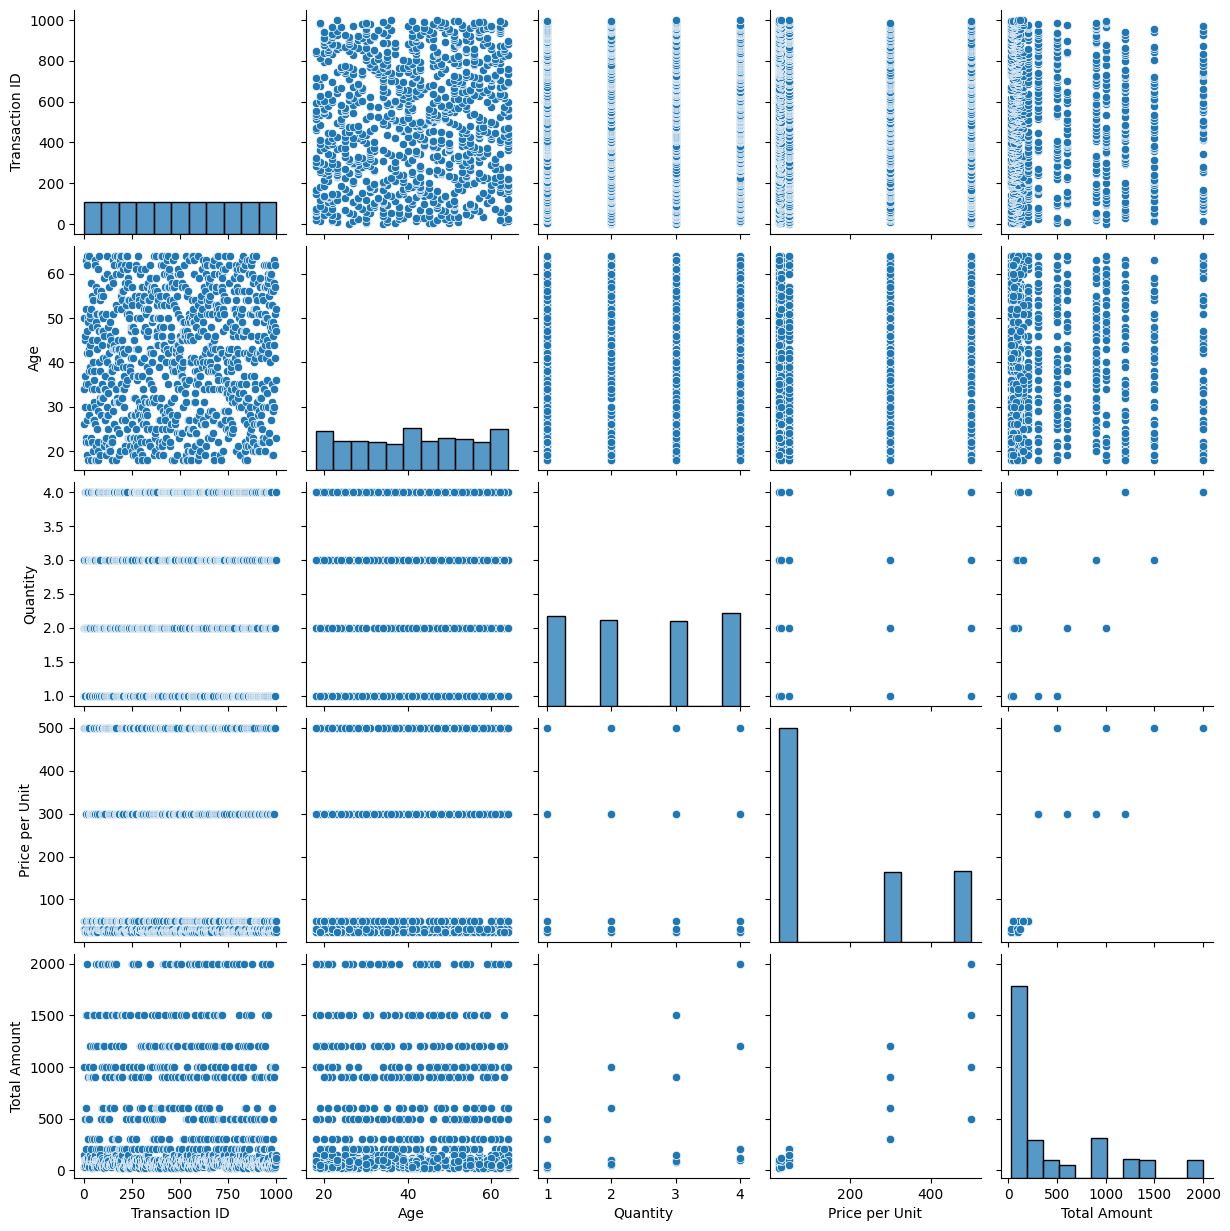

In [ ]:
sns.pairplot(df)

In [ ]:
#Sales by product analysis
category_sales =df.groupby('Product Category')['Total Amount'].sum()
print('\ncategory_sales:')
print(category_sales)


category_sales:
Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64


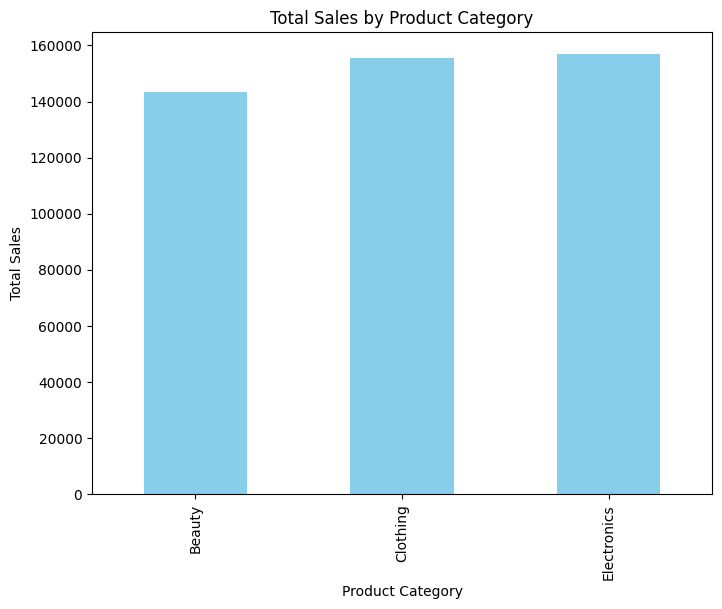

In [ ]:
#Bar chart
plt.figure(figsize=(8,6))
category_sales.plot(kind='bar',color='skyblue')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()

In [ ]:
df[df['Product Category'].isin(['Clothing','Beauty','Electronics'])]['Product Category'].value_counts()

,count
Product Category,
Clothing,351
Electronics,342
Beauty,307


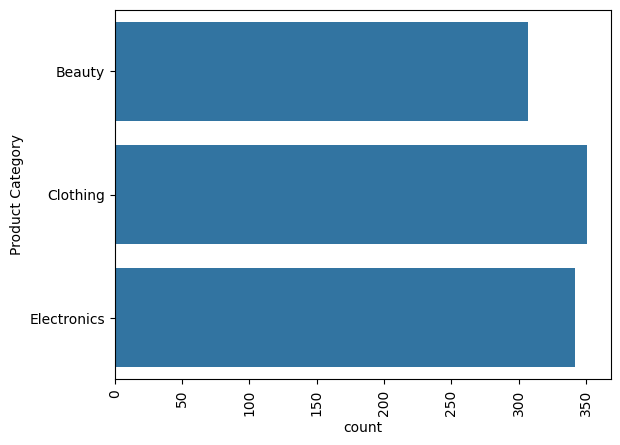

In [ ]:
sns.countplot(df['Product Category'],palette=None)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.groupby("Product Category")[['Quantity','Total Amount']].sum()

,Quantity,Total Amount
Product Category,,
Beauty,771,143515
Clothing,894,155580
Electronics,849,156905


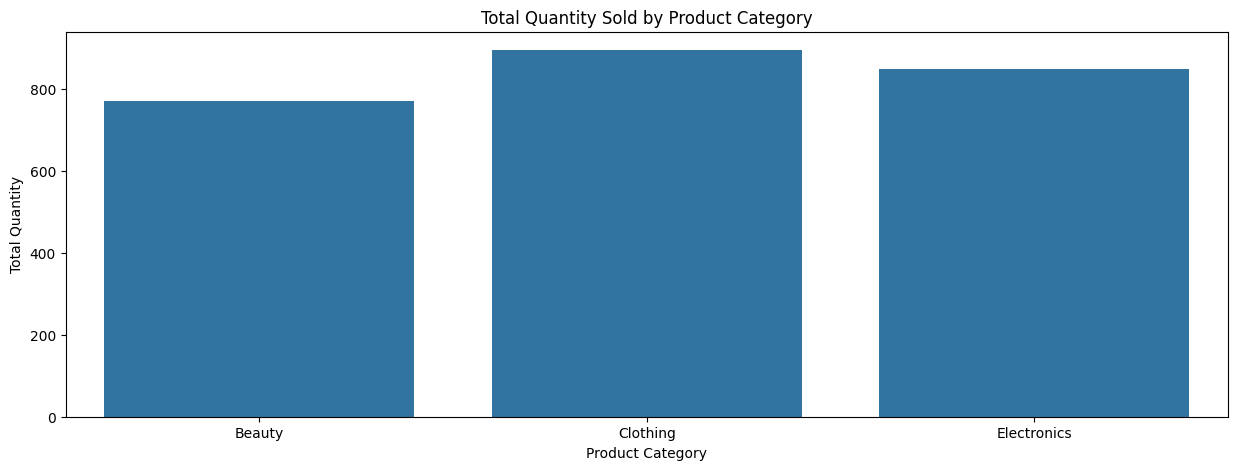

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x=df.groupby("Product Category")[['Quantity','Total Amount']].sum().index, y=df.groupby("Product Category")[['Quantity','Total Amount']].sum().Quantity, ax=ax)
plt.title('Total Quantity Sold by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity')
plt.show()

In [ ]:
#Sales by Gender
gender_sales =df.groupby('Gender')['Total Amount'].sum()
print('\ngender_sales:')
print(gender_sales)



gender_sales:
Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64


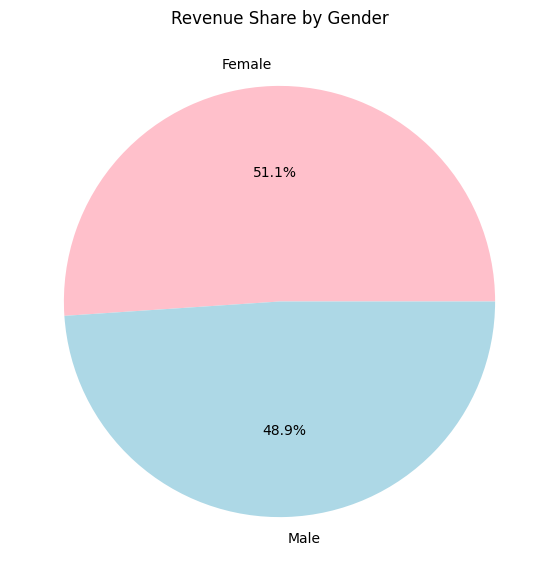

In [ ]:
plt.figure(figsize=(7, 7))
plt.pie(gender_sales, labels=gender_sales.index, autopct='%1.1f%%', colors=['pink', 'lightblue'])
plt.title('Revenue Share by Gender')
plt.show()

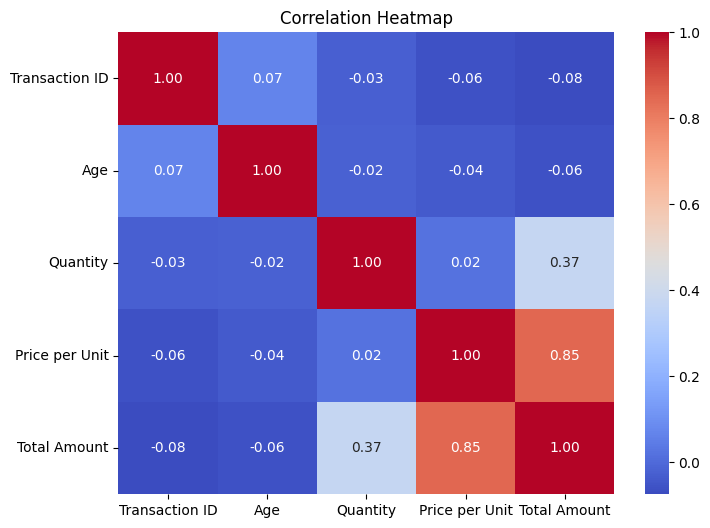

In [ ]:
# 5. Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# 6. Final Summary (Recommendations ke liye print)
print("\n=== Key Insights ===")
print("• Sabse zyada revenue: Electronics")
print("• Females thoda zyada spend karti hain")
print("• Peak months: May, October, December")
print("• Middle age (30-60) sabse zyada kharidte hain")


=== Key Insights ===
• Sabse zyada revenue: Electronics
• Females thoda zyada spend karti hain
• Peak months: May, October, December
• Middle age (30-60) sabse zyada kharidte hain
